In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline

# **Importing the dataset**

In [2]:
# Importing the dataset
dataset = pd.read_csv('heart.csv')

In [3]:
# Verifying the first lines
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Type and Missing Values information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Verfying the distribution of the numerical variables
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Verifying errors in the variables
for col in dataset.columns:
    print(col + ':',dataset.loc[:,col].unique())

Age: [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingBP: [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol: [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 40

Apparently there is no observation with missing values and abnormal input, hence no imputation is needed before a more careful exploration.

# **Preprocessing the variables**

The categorical variables of the dataset have no apparent order, therefore we will only the OneHotEncoding

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Features considering the OneHotEncoding of the dataset
feature_names = (
'Sex: F',
'Sex: M',
'ChestPainType: ASY',
'ChestPainType: ATA',
'ChestPainType: NAP',
'ChestPainType: TA',
'RestingECG: LVH',
'RestingECG: Normal',
'RestingECG: ST',
'ExerciseAngina: N',
'ExerciseAngina: Y',
'ST_Slope: Down',
'ST_Slope: Flat',
'ST_Slope: Up',
'Age',
'RestingBP',
'Cholesterol',
'FastingBS',
'MaxHR',
'Oldpeak',
'HeartDisease')


n_examples = len(dataset)
n_features = len(feature_names)

# OneHotEncoding the dataset
ct = ColumnTransformer([
    ('OneHotEncoding:',OneHotEncoder(),['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])],remainder='passthrough')

X = ct.fit_transform(dataset)

In [8]:
# Saving the encoded dataset
dataset_encoded = pd.DataFrame(X,columns=feature_names)
dataset_encoded.to_csv('heart_preprocessed.csv',index=False,encoding='utf-8')
dataset_encoded.head()

,Sex: F,Sex: M,ChestPainType: ASY,ChestPainType: ATA,ChestPainType: NAP,ChestPainType: TA,RestingECG: LVH,RestingECG: Normal,RestingECG: ST,ExerciseAngina: N,...,ST_Slope: Down,ST_Slope: Flat,ST_Slope: Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,40.0,140.0,289.0,0.0,172.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,37.0,130.0,283.0,0.0,98.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,54.0,150.0,195.0,0.0,122.0,0.0,0.0


# **Exploring the variables**

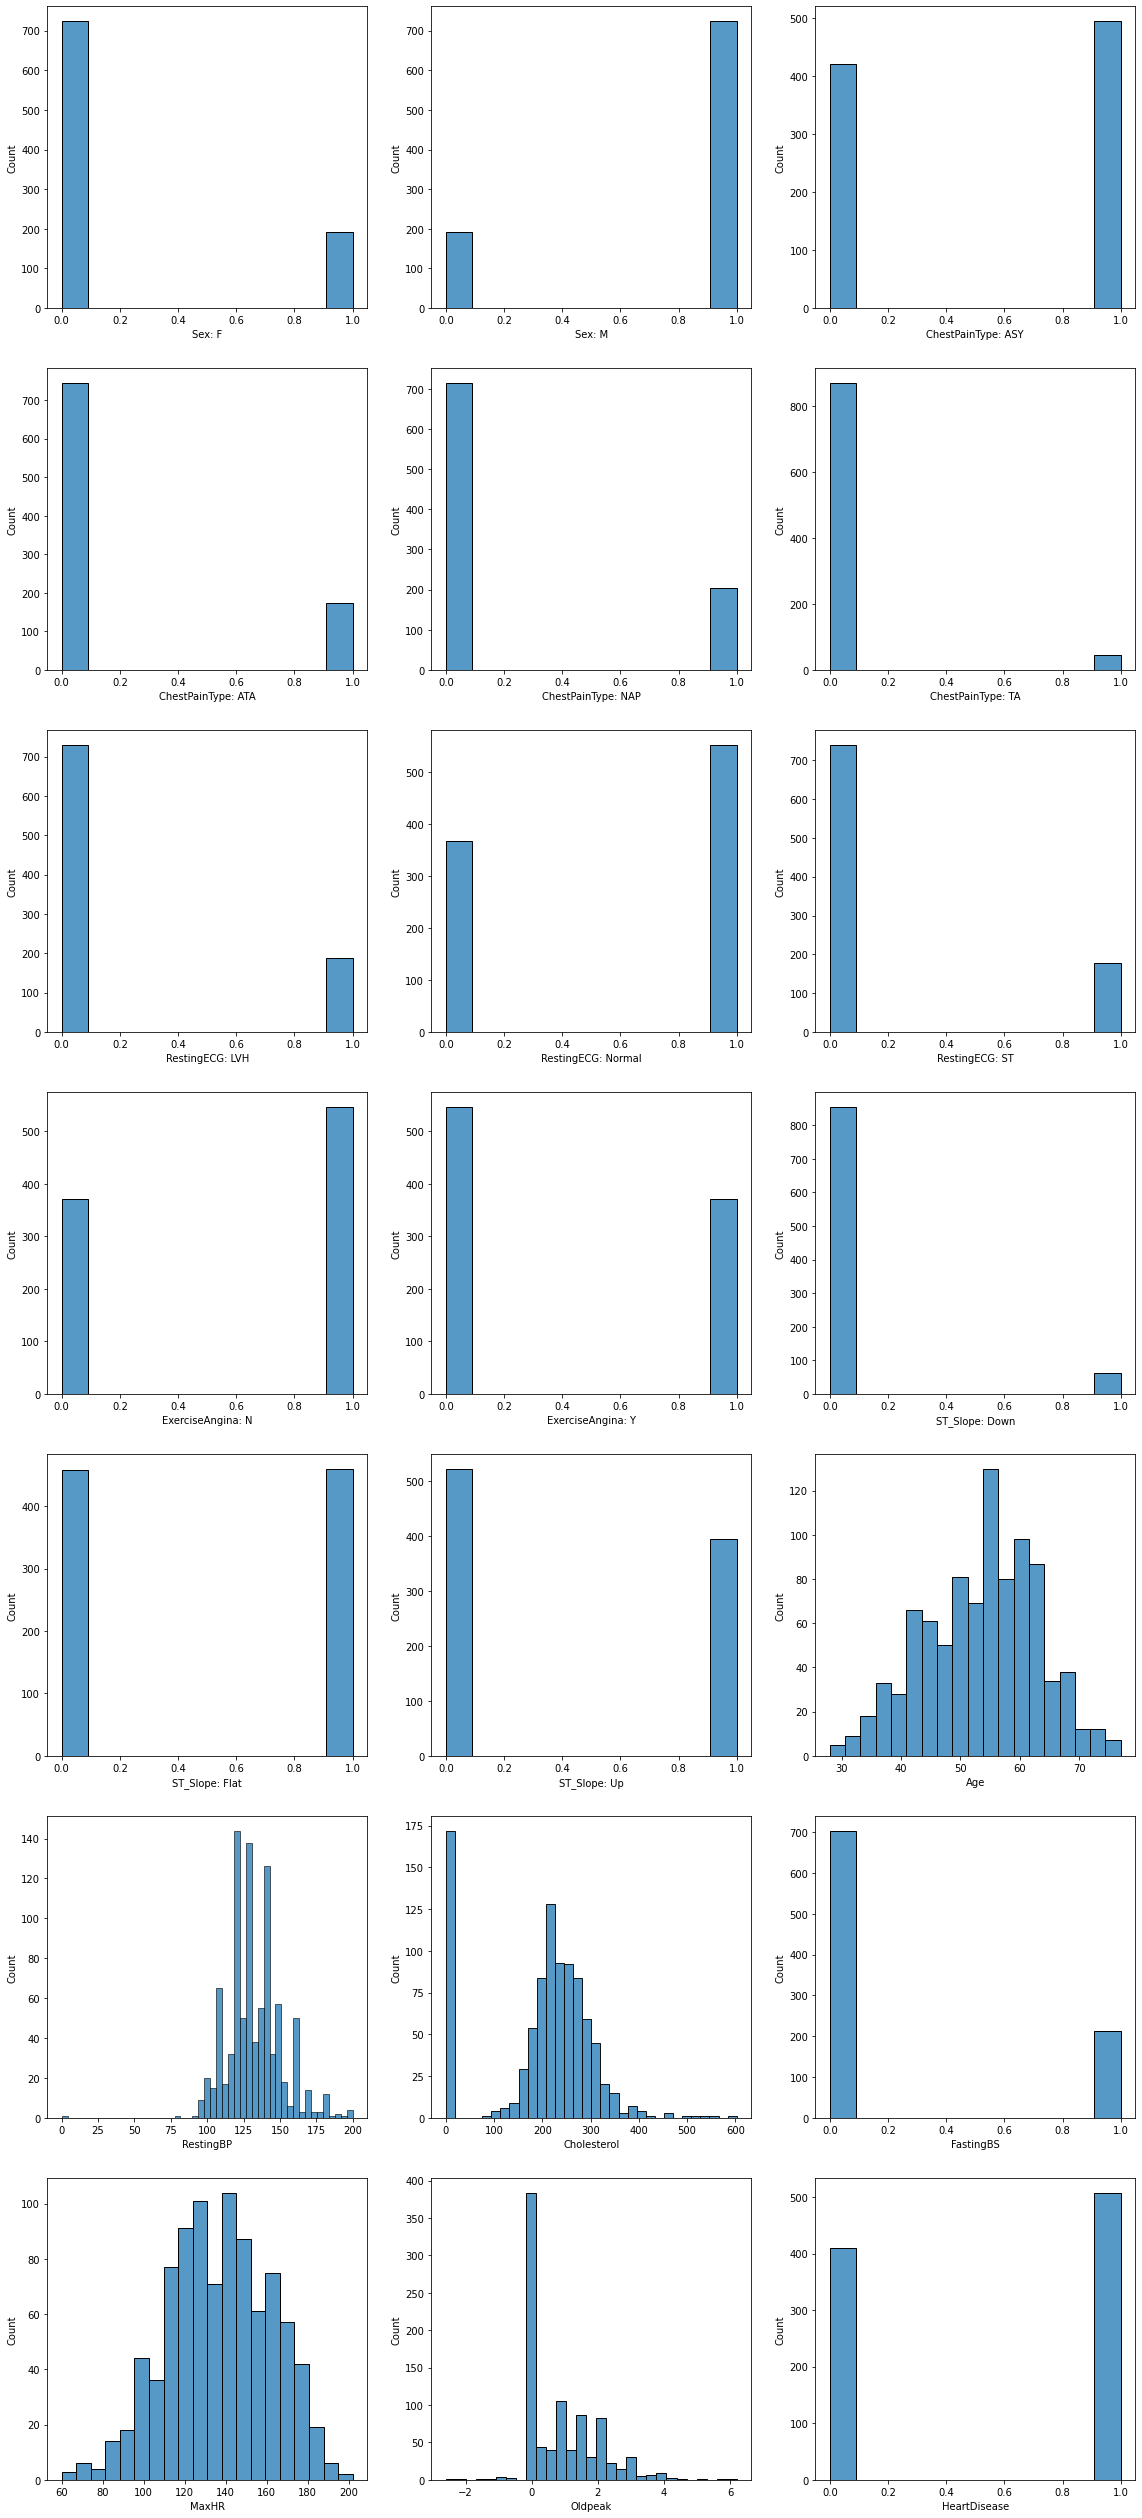

In [9]:
ncols = 3
nrows = (n_features//ncols) + 1 if n_features%ncols>0 else (n_features//ncols)

# Ploting histograms
fig,axes = plt.subplots(nrows=nrows,ncols=ncols)
fig.set_size_inches(6.5*ncols,6.5*nrows)

for i in range(n_features):
    col = i%ncols
    row = i//ncols 
    ax = axes[row,col]
    sns.histplot(data=dataset_encoded,x=feature_names[i],ax=ax)
plt.show()
fig.savefig('dataset_histogram.pdf',dpi=300)

There are some observations that can be done by the exploratory analysis of these variables:

$\bullet$ The response variable is balanced, meaning that there is not significative difference between the response 0 and 1.

$\bullet$ The numerical variables, except the Oldpeak, have a approximately normal distribution aspect.

$\bullet$ The Cholesterol and RestingBP variable have an abnormal value 0, since the absence of Cholesterol is not probable, at least for a large amount of people, and the RestingBP equal 0 mean that the heart stopped beating.

In [10]:
dataset_encoded[dataset_encoded['RestingBP'] < 25.0]

,Sex: F,Sex: M,ChestPainType: ASY,ChestPainType: ATA,ChestPainType: NAP,ChestPainType: TA,RestingECG: LVH,RestingECG: Normal,RestingECG: ST,ExerciseAngina: N,...,ST_Slope: Down,ST_Slope: Flat,ST_Slope: Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
449,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,55.0,0.0,0.0,0.0,155.0,1.5,1.0


In [11]:
dataset_encoded[dataset_encoded['Cholesterol'] == 0.0]

,Sex: F,Sex: M,ChestPainType: ASY,ChestPainType: ATA,ChestPainType: NAP,ChestPainType: TA,RestingECG: LVH,RestingECG: Normal,RestingECG: ST,ExerciseAngina: N,...,ST_Slope: Down,ST_Slope: Flat,ST_Slope: Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
293,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,65.0,115.0,0.0,0.0,93.0,0.0,1.0
294,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,32.0,95.0,0.0,1.0,127.0,0.7,1.0
295,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,61.0,105.0,0.0,1.0,110.0,1.5,1.0
296,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,50.0,145.0,0.0,1.0,139.0,0.7,1.0
297,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,57.0,110.0,0.0,1.0,131.0,1.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,43.0,122.0,0.0,0.0,120.0,0.5,1.0
515,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,63.0,130.0,0.0,1.0,160.0,3.0,0.0
518,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,48.0,102.0,0.0,1.0,110.0,1.0,1.0
535,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,56.0,130.0,0.0,0.0,122.0,1.0,1.0


 The case of RestingBP = 0 is not significative, since it may be the case of heart attack and even if it is not the case, there is only one observation with RestingBP = 0. 
 
 But the Cholesterol may be an error, since it occurs in most entries. 

# **Preprocessing Version 2**

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Features considering the OneHotEncoding and simple imputation of the dataset
feature_names = (
'Sex: F',
'Sex: M',
'ChestPainType: ASY',
'ChestPainType: ATA',
'ChestPainType: NAP',
'ChestPainType: TA',
'RestingECG: LVH',
'RestingECG: Normal',
'RestingECG: ST',
'ExerciseAngina: N',
'ExerciseAngina: Y',
'ST_Slope: Down',
'ST_Slope: Flat',
'ST_Slope: Up',
'Cholesterol',
'Age',
'RestingBP',
'FastingBS',
'MaxHR',
'Oldpeak',
'HeartDisease')


n_examples = len(dataset)
n_features = len(feature_names)

# OneHotEncoding the dataset
ct = ColumnTransformer([
    ('OneHotEncoding:',OneHotEncoder(),['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']),
    ('Simple Imputation: ',SimpleImputer(missing_values=0.0,strategy='median'),['Cholesterol'])],remainder='passthrough')

X = ct.fit_transform(dataset)

In [73]:
# Saving the encoded dataset
dataset_encoded = pd.DataFrame(X,columns=feature_names)
dataset_encoded.to_csv('heart_preprocessed.csv',index=False,encoding='utf-8')
dataset_encoded.head()

,Sex: F,Sex: M,ChestPainType: ASY,ChestPainType: ATA,ChestPainType: NAP,ChestPainType: TA,RestingECG: LVH,RestingECG: Normal,RestingECG: ST,ExerciseAngina: N,...,ST_Slope: Down,ST_Slope: Flat,ST_Slope: Up,Cholesterol,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,289.0,40.0,140.0,0.0,172.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,180.0,49.0,160.0,0.0,156.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,283.0,37.0,130.0,0.0,98.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,214.0,48.0,138.0,0.0,108.0,1.5,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,195.0,54.0,150.0,0.0,122.0,0.0,0.0


<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

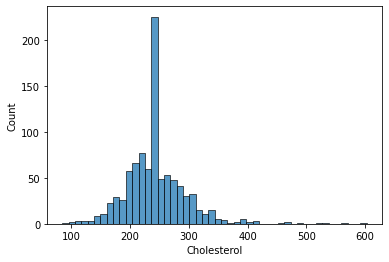

In [74]:
sns.histplot(data=dataset_encoded, x = 'Cholesterol')

In [75]:
dataset_encoded[dataset_encoded['Cholesterol'] == 0.0]

,Sex: F,Sex: M,ChestPainType: ASY,ChestPainType: ATA,ChestPainType: NAP,ChestPainType: TA,RestingECG: LVH,RestingECG: Normal,RestingECG: ST,ExerciseAngina: N,...,ST_Slope: Down,ST_Slope: Flat,ST_Slope: Up,Cholesterol,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease


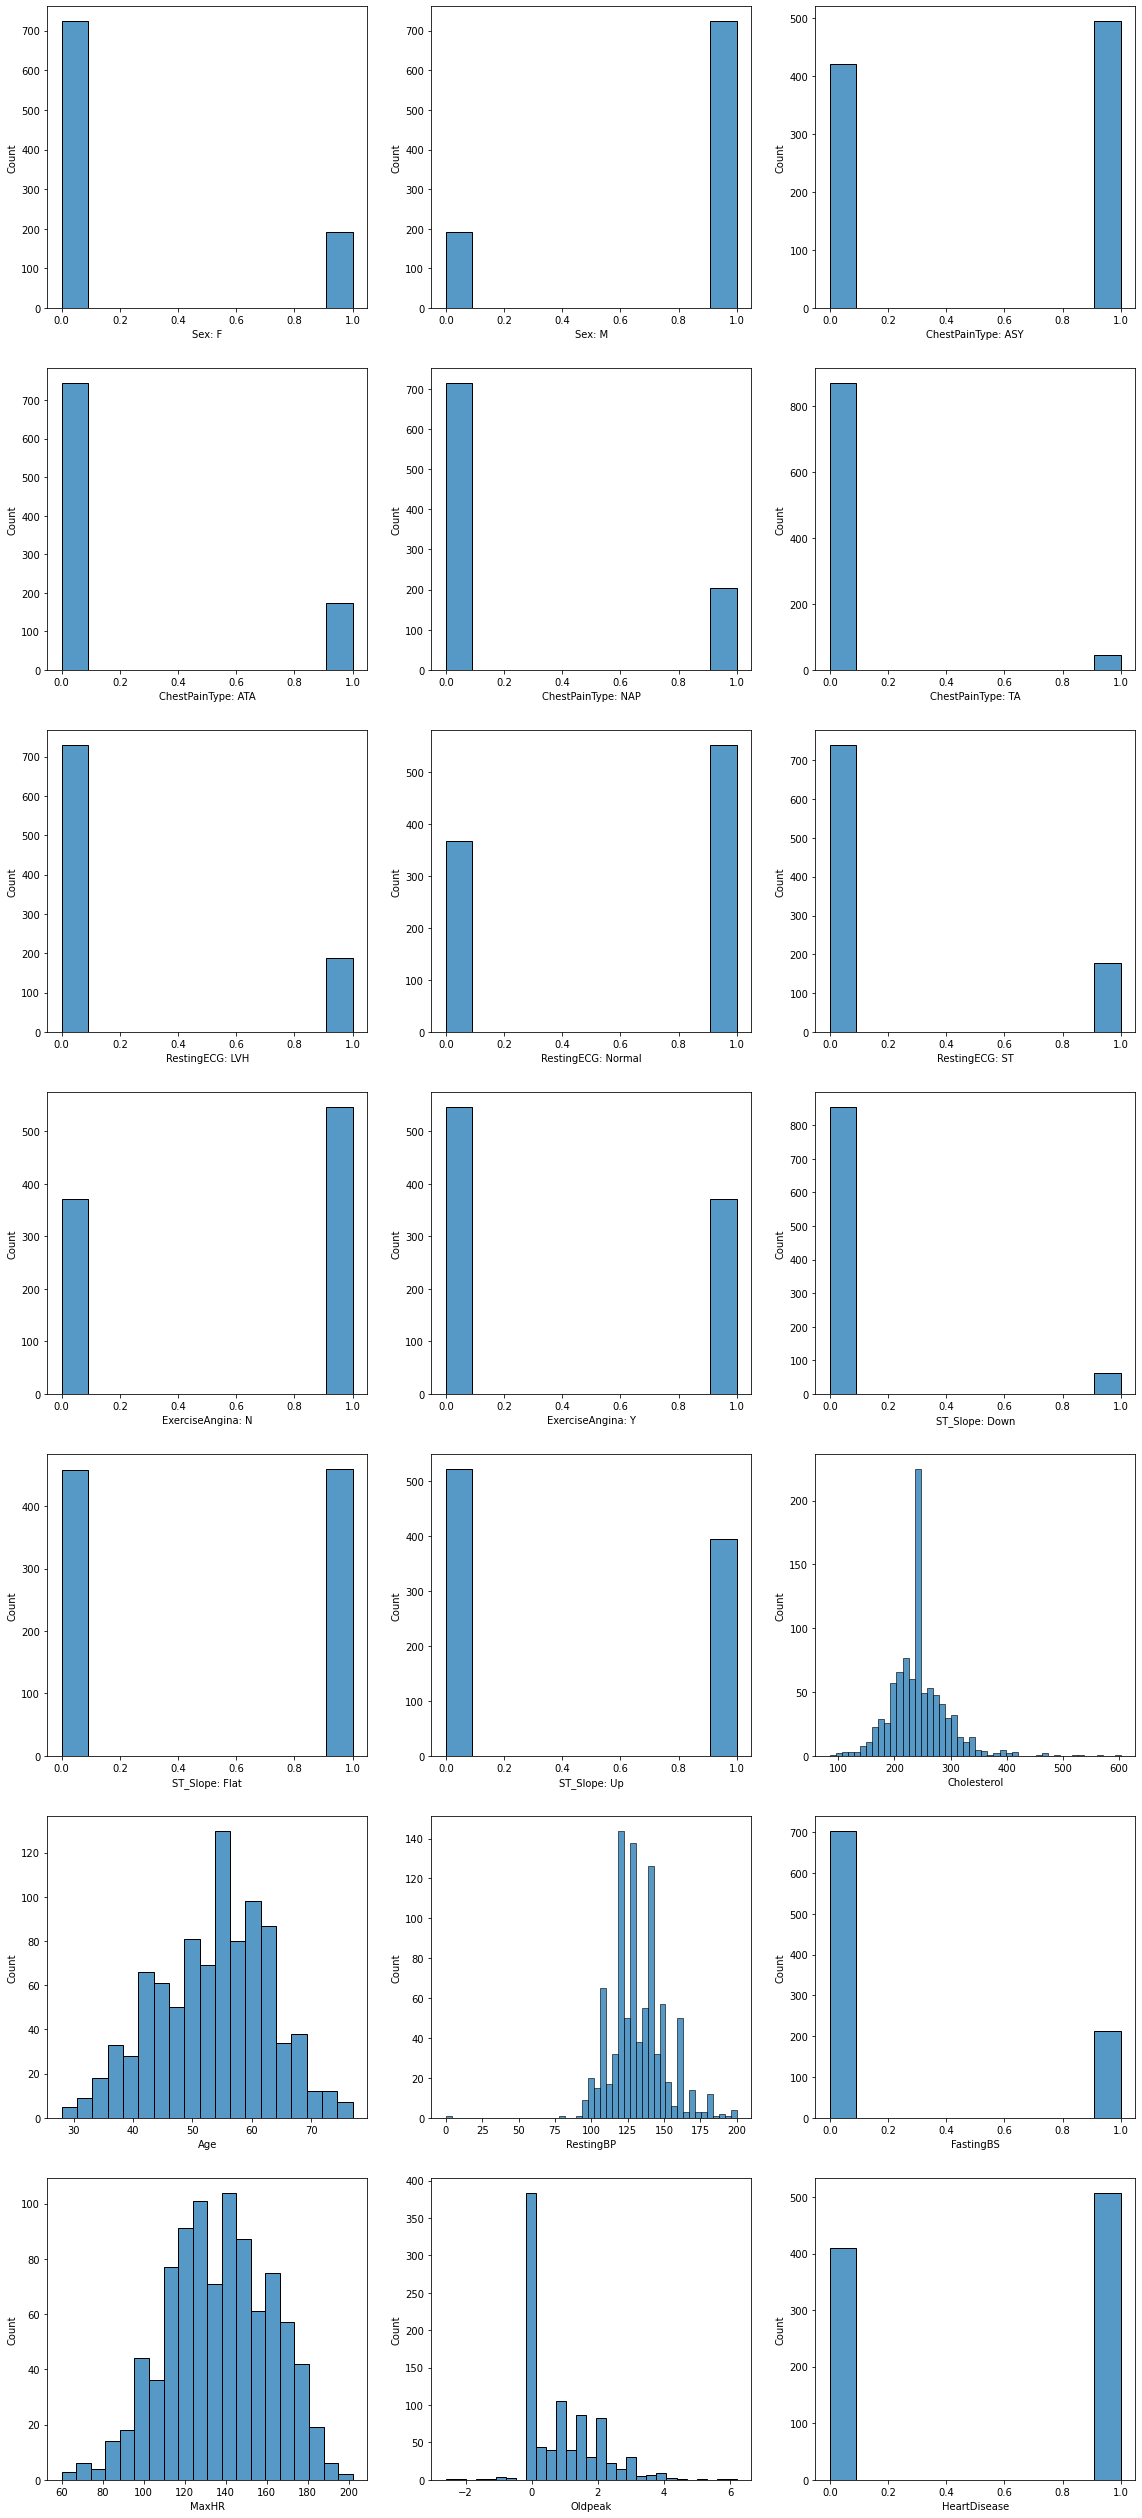

In [71]:
ncols = 3
nrows = (n_features//ncols) + 1 if n_features%ncols>0 else (n_features//ncols)

# Ploting histograms
fig,axes = plt.subplots(nrows=nrows,ncols=ncols)
fig.set_size_inches(6.5*ncols,6.5*nrows)

for i in range(n_features):
    col = i%ncols
    row = i//ncols 
    ax = axes[row,col]
    sns.histplot(data=dataset_encoded,x=feature_names[i],ax=ax)
plt.show()
fig.savefig('dataset_histogram_imputed.pdf',dpi=300)

In [76]:
from sklearn.preprocessing import MinMaxScaler


# Separating the input and output variables
n_features = X.shape[1]
X = dataset_encoded.values[:,:-1]
y = dataset_encoded.values[:,-1:]

y = y.astype(int)
X = X.astype(float)


n_examples = len(y)

# Train-Test Split
index = list(range(n_examples))

# 70 % - 30 % Train-Test Split
train_size = int(0.7*n_examples)
test_size = n_examples - train_size

# Shuffling Train-Test indices
np.random.seed(42)
np.random.shuffle(index)
train_index = index[:train_size].copy()
test_index = index[train_size:].copy()
np.random.seed(None)

# Train-Test Splitting
X_train,X_test,y_train,y_test = X[train_index],X[test_index],y[train_index],y[test_index]

# Scaling for regularization
sc_X = MinMaxScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

We can infer a baseline performance, fitting the model in all the features

In [77]:
# Randomized Search and distributions
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import loguniform
from scipy.stats import randint



# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Time
from tqdm.notebook import tqdm






########################### Logistic Regression ####################################


LR = LogisticRegression(random_state=42,solver='liblinear')

penalty = ['l1','l2']

# Hyperparameters distributions
distributions = dict(C=loguniform(1e-2,1e5),penalty=penalty)


RSCV_LR = RandomizedSearchCV(LR,param_distributions=distributions,n_iter=25,random_state=42)


########################### CART ####################################


cart = DecisionTreeClassifier(random_state=42)



# Hyperparameters distributions
distributions = dict(max_depth=list(range(2,20)))


RSCV_cart = RandomizedSearchCV(cart,param_distributions=distributions,n_iter=15,random_state=42)






########################### Random Forest ####################################


rf = RandomForestClassifier(random_state=42)



# Hyperparameters distributions
distributions = dict(max_depth=list(range(2,20)),n_estimators=randint(50,500))


RSCV_RF = RandomizedSearchCV(rf,param_distributions=distributions,n_iter=10,random_state=42)




########################### SVR ####################################


SV_class = SVC(degree=2)

kernel = ['rbf','poly','sigmoid']

# Hyperparameters distributions
distributions = dict(C=loguniform(1e-2,1e5),kernel=kernel)


RSCV_SVC = RandomizedSearchCV(SV_class,param_distributions=distributions,n_iter=10,random_state=42)


########################### XGBoost ####################################
xgbc = XGBClassifier(eval_metric='logloss',use_label_encoder=False,random_state=42)
# Hyperparameters distributions
param_dist = {'n_estimators': randint(150, 500),
              'learning_rate': loguniform(5e-4, 5e-2),
              'subsample': uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


RSCV_xgb = RandomizedSearchCV(xgbc,param_distributions=param_dist,n_iter=25,random_state=42)


########################### XGBoost ####################################
knn = KNeighborsClassifier()
# Hyperparameters distributions
distributions = dict(n_neighbors=list(range(2,20)))


RSCV_knn = RandomizedSearchCV(knn,param_distributions=distributions,n_iter=10,random_state=42)





########################### Loop ####################################

# Each Random Search Cross Validation
Random_search = {'LR':RSCV_LR,
                'CART':RSCV_cart, 
                'RF':RSCV_RF,
                'SVM':RSCV_SVC,
                'XGBoost':RSCV_xgb,
                'KNN':RSCV_knn}




y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)
Best_model = {}
Results = {}
Best_params = {}
############ Model Loop ################
for s in tqdm(['LR', 'CART', 'RF', 'SVM', 'XGBoost', 'KNN']):
    # Random Grid Search CV
    model_random_search = Random_search[s]
    model_random_search.fit(X_train_sc,y_train)
    # Choose the best estimator
    best_model_ = model_random_search.best_estimator_
    y_pred = best_model_.predict(X_test_sc)
    Best_model.update({s:best_model_})
    
    Results.update({s:{'CV_score':model_random_search.best_score_,
                      'Accuracy':accuracy_score(y_test,y_pred),
                      'Classification Report':pd.DataFrame(classification_report(y_test,y_pred,digits=4,output_dict=True)).T}})
    Best_params.update({s:model_random_search.best_params_})

  0%|          | 0/6 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [22]:
for model in Results.keys():
    print(model)
    display(Results[model])

LR


{'CV_score': 0.8769258720930232,
 'Accuracy': 0.8442028985507246,
 'Classification Report':               precision    recall  f1-score     support
 0              0.909910  0.753731  0.824490  134.000000
 1              0.800000  0.929577  0.859935  142.000000
 accuracy       0.844203  0.844203  0.844203    0.844203
 macro avg      0.854955  0.841654  0.842212  276.000000
 weighted avg   0.853362  0.844203  0.842726  276.000000}

CART


{'CV_score': 0.8535852713178294,
 'Accuracy': 0.822463768115942,
 'Classification Report':               precision    recall  f1-score     support
 0              0.857143  0.761194  0.806324  134.000000
 1              0.796178  0.880282  0.836120  142.000000
 accuracy       0.822464  0.822464  0.822464    0.822464
 macro avg      0.826661  0.820738  0.821222  276.000000
 weighted avg   0.825777  0.822464  0.821654  276.000000}

RF


{'CV_score': 0.8862766472868217,
 'Accuracy': 0.8297101449275363,
 'Classification Report':               precision    recall  f1-score    support
 0              0.891892  0.738806  0.808163  134.00000
 1              0.787879  0.915493  0.846906  142.00000
 accuracy       0.829710  0.829710  0.829710    0.82971
 macro avg      0.839885  0.827149  0.827534  276.00000
 weighted avg   0.838378  0.829710  0.828096  276.00000}

SVM


{'CV_score': 0.8691133720930232,
 'Accuracy': 0.8115942028985508,
 'Classification Report':               precision    recall  f1-score     support
 0              0.847458  0.746269  0.793651  134.000000
 1              0.784810  0.873239  0.826667  142.000000
 accuracy       0.811594  0.811594  0.811594    0.811594
 macro avg      0.816134  0.809754  0.810159  276.000000
 weighted avg   0.815226  0.811594  0.810637  276.000000}

XGBoost


{'CV_score': 0.8924903100775193,
 'Accuracy': 0.8478260869565217,
 'Classification Report':               precision    recall  f1-score     support
 0              0.896552  0.776119  0.832000  134.000000
 1              0.812500  0.915493  0.860927  142.000000
 accuracy       0.847826  0.847826  0.847826    0.847826
 macro avg      0.854526  0.845806  0.846464  276.000000
 weighted avg   0.853308  0.847826  0.846883  276.000000}

KNN


{'CV_score': 0.8660731589147286,
 'Accuracy': 0.8369565217391305,
 'Classification Report':               precision    recall  f1-score     support
 0              0.893805  0.753731  0.817814  134.000000
 1              0.797546  0.915493  0.852459  142.000000
 accuracy       0.836957  0.836957  0.836957    0.836957
 macro avg      0.845676  0.834612  0.835136  276.000000
 weighted avg   0.844281  0.836957  0.835638  276.000000}

# **Feature selection with the best model**

We can see that the Logistic Regression and XGBoost have similar performances, then by the simplicity of the Logistic Regression we will use this model

In [128]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Best model Feature Selector
xgb_class = Best_model['LR']

########################### Loop ####################################
# Forward Selection
sfs1 = sfs(xgb_class,k_features=1,forward=False,verbose=12,scoring='accuracy')
# Forward Feature Selection
X_train_sc_features = sfs1.fit_transform(X_train_sc,y_train)
X_test_sc_features = sfs1.transform(X_test_sc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  

In [134]:
# Performance (cross-validation) for each number of features
feature_selection = pd.DataFrame(sfs1.subsets_).T
feature_selection

,feature_idx,cv_scores,avg_score,feature_names
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8604651162790697, 0.9069767441860465, 0.867...",0.876926,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
19,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[0.8682170542635659, 0.8992248062015504, 0.875...",0.880051,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14..."
18,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15...","[0.875968992248062, 0.8992248062015504, 0.875,...",0.881601,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15..."
17,"(0, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 1...","[0.875968992248062, 0.9069767441860465, 0.875,...",0.883152,"(0, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 1..."
16,"(0, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 1...","[0.875968992248062, 0.9069767441860465, 0.875,...",0.884714,"(0, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 1..."
15,"(0, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 17, 1...","[0.875968992248062, 0.9069767441860465, 0.875,...",0.884714,"(0, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 17, 1..."
14,"(0, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 17, 18)","[0.875968992248062, 0.9069767441860465, 0.875,...",0.884714,"(0, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 17, 18)"
13,"(0, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 17, 18)","[0.875968992248062, 0.9069767441860465, 0.875,...",0.884714,"(0, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 17, 18)"
12,"(0, 2, 3, 4, 5, 8, 9, 11, 12, 13, 17, 18)","[0.875968992248062, 0.9069767441860465, 0.875,...",0.884714,"(0, 2, 3, 4, 5, 8, 9, 11, 12, 13, 17, 18)"
11,"(0, 2, 3, 4, 5, 8, 9, 11, 12, 13, 17)","[0.875968992248062, 0.9069767441860465, 0.875,...",0.884714,"(0, 2, 3, 4, 5, 8, 9, 11, 12, 13, 17)"


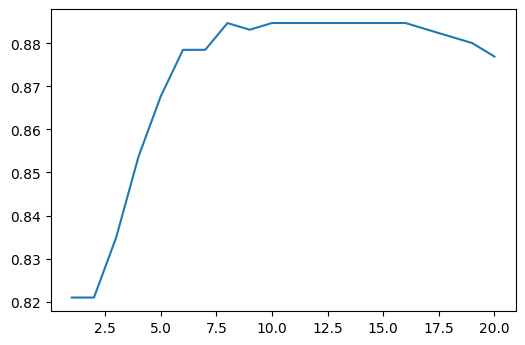

In [135]:
# Features plot cross-validation average score
fig = plt.figure(dpi = 100)
plt.plot(feature_selection['avg_score'])
plt.show()

In [143]:
feature_selection['avg_score'] = feature_selection['avg_score'].astype(float)
feature_selection['avg_score']

20    0.876926
19    0.880051
18    0.881601
17    0.883152
16    0.884714
15    0.884714
14    0.884714
13    0.884714
12    0.884714
11    0.884714
10    0.884714
9     0.883152
8     0.884702
7     0.878488
6     0.878476
5     0.867672
4     0.853658
3     0.834944
2     0.820942
1     0.820942
Name: avg_score, dtype: float64

# **Selected features**

In [145]:
# Features selected
features_selected = (0, 2, 3, 4, 9, 12, 13, 17)
features_selected_names = []
n_features_selected = len(features_selected)
for i in range(n_features_selected):
    idx = features_selected[i]
    features_selected_names.append(feature_names[idx])


# Displaying Features
features_string = ''
for string in features_selected_names:
    features_string += string + '\n'
print(features_string)

Sex: F
ChestPainType: ASY
ChestPainType: ATA
ChestPainType: NAP
ExerciseAngina: N
ST_Slope: Flat
ST_Slope: Up
FastingBS



In [146]:
# Features selected
X_train_sc_features = X_train_sc[:,features_selected]
X_test_sc_features = X_test_sc[:,features_selected]

In [147]:
########################### Logistic Regression ####################################


LR = LogisticRegression(random_state=42,solver='liblinear')

penalty = ['l1','l2']

# Hyperparameters distributions
distributions = dict(C=loguniform(1e-2,1e5),penalty=penalty)


RSCV_LR = RandomizedSearchCV(LR,param_distributions=distributions,n_iter=25,random_state=42)


########################### CART ####################################


cart = DecisionTreeClassifier(random_state=42)



# Hyperparameters distributions
distributions = dict(max_depth=list(range(2,20)))


RSCV_cart = RandomizedSearchCV(cart,param_distributions=distributions,n_iter=15,random_state=42)






########################### Random Forest ####################################


rf = RandomForestClassifier()



# Hyperparameters distributions
distributions = dict(max_depth=list(range(2,20)),n_estimators=randint(50,500))


RSCV_RF = RandomizedSearchCV(rf,param_distributions=distributions,n_iter=10,random_state=42)




########################### SVR ####################################


SV_class = SVC(degree=2)

kernel = ['rbf','poly','sigmoid']

# Hyperparameters distributions
distributions = dict(C=loguniform(1e-2,1e5),kernel=kernel)


RSCV_SVC = RandomizedSearchCV(SV_class,param_distributions=distributions,n_iter=10,random_state=42)


########################### XGBoost ####################################
xgbc = XGBClassifier(eval_metric='logloss',use_label_encoder=False)
# Hyperparameters distributions
param_dist = {'n_estimators': randint(150, 500),
              'learning_rate': loguniform(5e-4, 5e-2),
              'subsample': uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


RSCV_xgb = RandomizedSearchCV(xgbc,param_distributions=param_dist,n_iter=25,random_state=42)


########################### XGBoost ####################################
knn = KNeighborsClassifier()
# Hyperparameters distributions
distributions = dict(n_neighbors=list(range(2,20)))


RSCV_knn = RandomizedSearchCV(knn,param_distributions=distributions,n_iter=10,random_state=42)





########################### Loop ####################################

# Each Random Search Cross Validation
Random_search = {'LR':RSCV_LR,
                'CART':RSCV_cart, 
                'RF':RSCV_RF,
                'SVM':RSCV_SVC,
                'XGBoost':RSCV_xgb,
                'KNN':RSCV_knn}




y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)
Best_model = {}
Results = {}
Best_params = {}
############ Model Loop ################
for s in tqdm(['LR', 'CART', 'RF', 'SVM', 'XGBoost', 'KNN']):
    # Random Grid Search CV
    model_random_search = Random_search[s]
    model_random_search.fit(X_train_sc_features,y_train)
    # Update the best model
    best_model_ = model_random_search.best_estimator_
    y_pred = best_model_.predict(X_test_sc_features)
    Best_model.update({s:best_model_})
    Results.update({s:{'CV_score':model_random_search.best_score_,
                      'Accuracy':accuracy_score(y_test,y_pred),
                      'Classification Report':pd.DataFrame(classification_report(y_test,y_pred,digits=4,output_dict=True)).T}})
    Best_params.update({s:model_random_search.best_params_})

  0%|          | 0/6 [00:00<?, ?it/s]

In [57]:
Results

{'LR': {'CV_score': 0.8566981589147286,
  'Accuracy': 0.8260869565217391,
  'Classification Report':               precision    recall  f1-score     support
  0              0.877193  0.746269  0.806452  134.000000
  1              0.790123  0.901408  0.842105  142.000000
  accuracy       0.826087  0.826087  0.826087    0.826087
  macro avg      0.833658  0.823839  0.824278  276.000000
  weighted avg   0.832396  0.826087  0.824795  276.000000},
 'CART': {'CV_score': 0.8520469961240309,
  'Accuracy': 0.8260869565217391,
  'Classification Report':               precision    recall  f1-score     support
  0              0.870690  0.753731  0.808000  134.000000
  1              0.793750  0.894366  0.841060  142.000000
  accuracy       0.826087  0.826087  0.826087    0.826087
  macro avg      0.832220  0.824049  0.824530  276.000000
  weighted avg   0.831105  0.826087  0.825009  276.000000},
 'RF': {'CV_score': 0.8831516472868216,
  'Accuracy': 0.8152173913043478,
  'Classification Report':

After trying some combinations of features given by the backward selection, we can infer that this approach does not improve the baseline performance.

We can try the ANOVA F-Statistic to filter the features, by the function ``f_classif``.

In [148]:
from sklearn.feature_selection import f_classif



scores,p_values = f_classif(X_train_sc, y_train)




index = np.flip(scores.argsort())

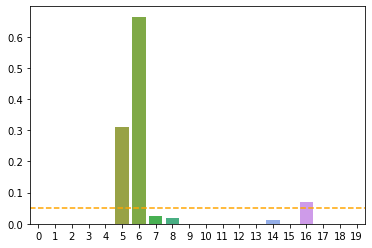

In [149]:
bar_plot = sns.barplot(y = p_values,x = list(range(0,n_features)))
fig = plt.gcf()

ax = plt.gca()

ax.axhline(y = 5/100,c = '#FFA500',ls='--')

ax.set_yscale('linear')

In [150]:
# Features selected
features_selected = (0,  1,  2,  3,  4,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 19)
features_selected_names = []
n_features_selected = len(features_selected)
for i in range(n_features_selected):
    idx = features_selected[i]
    features_selected_names.append(feature_names[idx])


# Displaying Features
features_string = ''
for string in features_selected_names:
    features_string += string + '\n'
print(features_string)

Sex: F
Sex: M
ChestPainType: ASY
ChestPainType: ATA
ChestPainType: NAP
RestingECG: Normal
RestingECG: ST
ExerciseAngina: N
ExerciseAngina: Y
ST_Slope: Down
ST_Slope: Flat
ST_Slope: Up
Cholesterol
Age
FastingBS
MaxHR
Oldpeak



In [125]:
# Features selected
X_train_sc_features = X_train_sc[:,features_selected]
X_test_sc_features = X_test_sc[:,features_selected]

In [126]:
########################### Logistic Regression ####################################


LR = LogisticRegression(random_state=42,solver='liblinear')

penalty = ['l1','l2']

# Hyperparameters distributions
distributions = dict(C=loguniform(1e-2,1e5),penalty=penalty)


RSCV_LR = RandomizedSearchCV(LR,param_distributions=distributions,n_iter=25,random_state=42)


########################### CART ####################################


cart = DecisionTreeClassifier(random_state=42)



# Hyperparameters distributions
distributions = dict(max_depth=list(range(2,20)))


RSCV_cart = RandomizedSearchCV(cart,param_distributions=distributions,n_iter=15,random_state=42)






########################### Random Forest ####################################


rf = RandomForestClassifier()



# Hyperparameters distributions
distributions = dict(max_depth=list(range(2,20)),n_estimators=randint(50,500))


RSCV_RF = RandomizedSearchCV(rf,param_distributions=distributions,n_iter=10,random_state=42)




########################### SVR ####################################


SV_class = SVC(degree=2)

kernel = ['rbf','poly','sigmoid']

# Hyperparameters distributions
distributions = dict(C=loguniform(1e-2,1e5),kernel=kernel)


RSCV_SVC = RandomizedSearchCV(SV_class,param_distributions=distributions,n_iter=10,random_state=42)


########################### XGBoost ####################################
xgbc = XGBClassifier(eval_metric='logloss',use_label_encoder=False)
# Hyperparameters distributions
param_dist = {'n_estimators': randint(150, 500),
              'learning_rate': loguniform(5e-4, 5e-2),
              'subsample': uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


RSCV_xgb = RandomizedSearchCV(xgbc,param_distributions=param_dist,n_iter=25,random_state=42)


########################### XGBoost ####################################
knn = KNeighborsClassifier()
# Hyperparameters distributions
distributions = dict(n_neighbors=list(range(2,20)))


RSCV_knn = RandomizedSearchCV(knn,param_distributions=distributions,n_iter=10,random_state=42)





########################### Loop ####################################

# Each Random Search Cross Validation
Random_search = {'LR':RSCV_LR,
                'CART':RSCV_cart, 
                'RF':RSCV_RF,
                'SVM':RSCV_SVC,
                'XGBoost':RSCV_xgb,
                'KNN':RSCV_knn}




y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)
Best_model = {}
Results = {}
Best_params = {}
############ Model Loop ################
for s in tqdm(['LR', 'CART', 'RF', 'SVM', 'XGBoost', 'KNN']):
    # Random Grid Search CV
    model_random_search = Random_search[s]
    model_random_search.fit(X_train_sc_features,y_train)
    # Update the best model
    best_model_ = model_random_search.best_estimator_
    y_pred = best_model_.predict(X_test_sc_features)
    Best_model.update({s:best_model_})
    Results.update({s:{'CV_score':model_random_search.best_score_,
                      'Accuracy':accuracy_score(y_test,y_pred),
                      'Classification Report':pd.DataFrame(classification_report(y_test,y_pred,digits=4,output_dict=True)).T}})
    Best_params.update({s:model_random_search.best_params_})

  0%|          | 0/6 [00:00<?, ?it/s]

In [127]:
Results

{'LR': {'CV_score': 0.8784762596899224,
  'Accuracy': 0.8442028985507246,
  'Classification Report':               precision    recall  f1-score     support
  0              0.909910  0.753731  0.824490  134.000000
  1              0.800000  0.929577  0.859935  142.000000
  accuracy       0.844203  0.844203  0.844203    0.844203
  macro avg      0.854955  0.841654  0.842212  276.000000
  weighted avg   0.853362  0.844203  0.842726  276.000000},
 'CART': {'CV_score': 0.8582727713178293,
  'Accuracy': 0.822463768115942,
  'Classification Report':               precision    recall  f1-score     support
  0              0.857143  0.761194  0.806324  134.000000
  1              0.796178  0.880282  0.836120  142.000000
  accuracy       0.822464  0.822464  0.822464    0.822464
  macro avg      0.826661  0.820738  0.821222  276.000000
  weighted avg   0.825777  0.822464  0.821654  276.000000},
 'RF': {'CV_score': 0.8738493217054263,
  'Accuracy': 0.8297101449275363,
  'Classification Report': 

Even excluding the least promising variables, we still have a better performance with the XGBoost in all the features.


We can make a more careful hyperparameter selection.

In [161]:
########################### XGBoost ####################################
xgbc = XGBClassifier(eval_metric='logloss',use_label_encoder=False,random_state=42)
# Hyperparameters distributions
param_dist = {'n_estimators': randint(150, 500),
              'learning_rate': loguniform(1e-4, 1e-1),
              'subsample': uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4],
              'reg_alpha': loguniform(1e-5,1e2)
             }


RSCV_xgb = RandomizedSearchCV(xgbc,param_distributions=param_dist,n_iter=50,random_state=42)


RSCV_xgb.fit(X_train_sc,y_train)


classifier = RSCV_xgb.best_estimator_


y_pred = classifier.predict(X_test_sc)

class_report = pd.DataFrame(classification_report(y_test,y_pred,digits=4,output_dict=True)).T
cv_score = RSCV_xgb.best_score_

display(class_report)
display(cv_score)

,precision,recall,f1-score,support
0,0.885965,0.753731,0.814516,134.000000
1,0.796296,0.908451,0.848684,142.000000
accuracy,0.833333,0.833333,0.833333,0.833333
macro avg,0.841131,0.831091,0.831600,276.000000
weighted avg,0.839831,0.833333,0.832095,276.000000


0.8862645348837208

In [162]:
########################### XGBoost ####################################
xgbc = XGBClassifier(eval_metric='logloss',use_label_encoder=False,random_state=42)
# Hyperparameters distributions
param_dist = {'n_estimators': randint(150, 500),
              'learning_rate': loguniform(1e-4, 1e-1),
              'subsample': uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4],
              'reg_lambda': loguniform(1e-5,1e2)
             }


RSCV_xgb = RandomizedSearchCV(xgbc,param_distributions=param_dist,n_iter=50,random_state=42)


RSCV_xgb.fit(X_train_sc,y_train)


classifier = RSCV_xgb.best_estimator_


y_pred = classifier.predict(X_test_sc)

class_report = pd.DataFrame(classification_report(y_test,y_pred,digits=4,output_dict=True)).T
cv_score = RSCV_xgb.best_score_

display(class_report)
display(cv_score)

,precision,recall,f1-score,support
0,0.895652,0.768657,0.827309,134.000000
1,0.807453,0.915493,0.858086,142.000000
accuracy,0.844203,0.844203,0.844203,0.844203
macro avg,0.851553,0.842075,0.842698,276.000000
weighted avg,0.850275,0.844203,0.843144,276.000000


0.8893895348837209